# K-nearest neighbors
K-nearest neighbors, or KNN for short, is a clustering algorithm. That means it's non-parametric since it doesn't use a model with parameters to be learnt. It's supervised since the training data is used to compute the clusters and is kept in memory in order to recompute the clusters as soon as new data is acquired. The clusters are built from a certain number N of training data points with labels $\{(x^{(n)}, y^{(n)})\}_{n=1}^N$, in a D dimensional space. We will build clusters for classification using the Iris data set. The idea behind k-nearest neighbors to classify a new data point is to compute the k nearest neighbor and assign it to the class that is shared by the majority of those neighbors. The distance can be computed using different metrics: Euclidean, Manhattan. The dimensionality depends on the number of features used to represent each data point. There exist different algorithms to compute the nearest neighbors. The basic one is the brute-force approach that is computing the distance between all the data points and using the closest k points to determine the class of the new data point. The brute-force approach has a time complexity $O[DN^2]$ and it can be used only for small data sets. Other algorithms have a better time complexity such as KD-Tree that has $O[DNlog(N)]$. Algorithms to reduce the dimensionality can be used before the k-nearest neighbor algorithm in case of high dimensionality.   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.23.1
pandas version: 1.4.3


## The Iris data set
We download the Iris data set from the Machine Learning Repository of the University of California Irvine [website](https://archive.ics.uci.edu/ml/index.php).

In [2]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None, encoding='utf-8')
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data pre-processing
We need to prepare the data to be used for the training of the model. The pre-process consists of three steps: features selection, data partition, data normalization.

### Features selection
We copy the data from the Pandas dataframe to a NumPy array and then we select two features for the classification task: petal length and petal width. The labels y are represented by the names of the three types of Iris.

In [3]:
petal_length_col = 2
petal_width_col = 3
X = df.iloc[:, [petal_length_col, petal_width_col]].values # extract petal length and petal length
y = df.iloc[:, 4].values 
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)
y = y.astype(np.int64)
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Data partition
We split the data into a training set and a validation set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Data normalization
Finally we normalize the data. We apply a linear transformation the two subsets in order to be centered around their mean value and scaled by their standard deviation.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training the model
We use the Scikit-learn implementation of [nearest neighbors classification](https://scikit-learn.org/stable/modules/neighbors.html). 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

## Data visualization
We define a function to plot the data and show the boundaries between the three types of iris

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

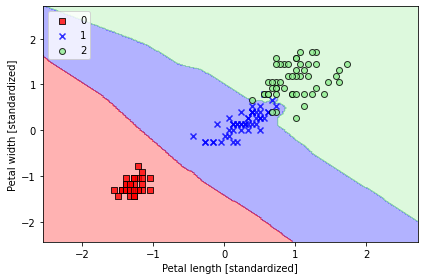

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=knn)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()